# Neural Networks

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Dataset

In [2]:
# MNIST (28x28)
 
from sklearn.datasets import load_digits

digits = load_digits()

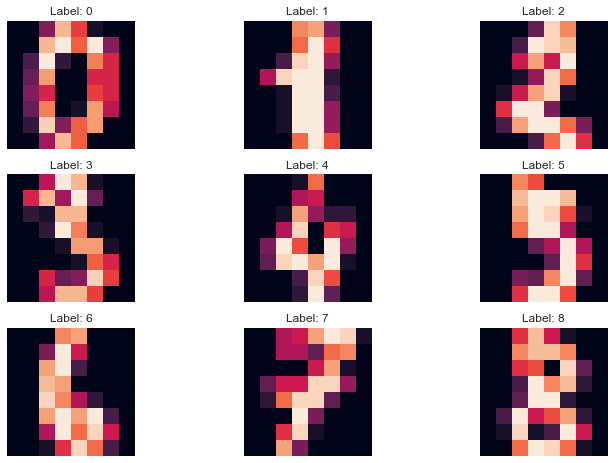

In [3]:
plt.figure(figsize=(12,8))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(digits.images[i])
  plt.title(f"Label: {digits.target[i]}")
  plt.axis("off")

In [4]:
print("Image:")
print(digits.images[0])
print(f"Image shape: {digits.images[0].shape}")
print(f"Image data: {digits.data[0].shape}")
print(f"Image Label: {digits.target[0]}")

Image:
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
Image shape: (8, 8)
Image data: (64,)
Image Label: 0


In [5]:
from sklearn.preprocessing import OneHotEncoder

X = digits.data
y = OneHotEncoder().fit_transform(digits.target.reshape(-1, 1)).toarray()

In [6]:
# Normalization
X /= X.max()

In [7]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (1797, 64)
y shape: (1797, 10)


In [8]:
y[:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5)

In [10]:
print(f"Train samples: {len(X_train)}")
print(f"Valid samples: {len(X_valid)}")
print(f"Test  samples: {len(X_test)}")

Train samples: 1437
Valid samples: 180
Test  samples: 180


In [11]:
# sigmoid -> [0,1]
# tanh -> [-1, 1]
# relu -> [0, n]
# softmax -> [0, 1]

# Single-Layer Perceptrons

![alt text](https://www.tutorialspoint.com/tensorflow/images/single_layer_perceptron.jpg)

# Multi-Layer Perceptrons (MLP)
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

![alt text](https://www.tutorialspoint.com/tensorflow/images/schematic_representation.jpg)

_Images are taken from: https://www.tutorialspoint.com/tensorflow/tensorflow_single_layer_perceptron.htm_

In [11]:
from sklearn.neural_network import MLPClassifier

# 64, 128, 128, 32, 10

model = MLPClassifier(hidden_layer_sizes = (128, 128, 32), learning_rate_init=0.01)

In [12]:
model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(128, 128, 32), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [13]:
model.score(X_valid, y_valid)

0.9444444444444444

In [14]:
sample = X_test[0]

prediction = model.predict([sample])
print(f"Prediction: {prediction}")

Prediction: [[0 0 0 0 0 0 0 0 0 1]]


In [15]:
prediction = np.argmax(prediction[0])
print(f"Prediction: {prediction}")

Prediction: 9


(-0.5, 7.5, 7.5, -0.5)

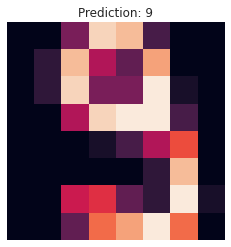

In [16]:
plt.imshow(sample.reshape(8,8))
plt.title(f"Prediction: {prediction}")
plt.axis("off")

# Deep Learning with GPU

* Tensorflow (or Keras)
* PyTorch

In [17]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [18]:
mlp_model = Sequential()

mlp_model.add(Dense(128)) # first hidden 
mlp_model.add(Dense(128)) # second hidden
mlp_model.add(Dense(32)) # third hidden

# output layer
mlp_model.add(Dense(10, activation="softmax")) # output

mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='acc')

In [19]:
mlp_model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_valid, y_valid))

Epoch 1/20
90/90 [==============================] - 1s 8ms/step - loss: 1.3576 - acc: 0.6007 - val_loss: 0.3381 - val_acc: 0.8944
Epoch 2/20
90/90 [==============================] - 0s 2ms/step - loss: 0.2302 - acc: 0.9469 - val_loss: 0.2726 - val_acc: 0.9056
Epoch 3/20
90/90 [==============================] - 0s 2ms/step - loss: 0.1516 - acc: 0.9535 - val_loss: 0.1567 - val_acc: 0.9444
Epoch 4/20
90/90 [==============================] - 0s 2ms/step - loss: 0.1038 - acc: 0.9726 - val_loss: 0.1435 - val_acc: 0.9444
Epoch 5/20
90/90 [==============================] - 0s 2ms/step - loss: 0.1120 - acc: 0.9597 - val_loss: 0.1546 - val_acc: 0.9333
Epoch 6/20
90/90 [==============================] - 0s 2ms/step - loss: 0.0988 - acc: 0.9727 - val_loss: 0.1614 - val_acc: 0.9222
Epoch 7/20
90/90 [==============================] - 0s 2ms/step - loss: 0.0745 - acc: 0.9769 - val_loss: 0.1368 - val_acc: 0.9444
Epoch 8/20
90/90 [==============================] - 0s 2ms/step - loss: 0.0653 - acc: 0.98

In [20]:
sample = X_test[0]

prediction = mlp_model.predict(sample.reshape(1, -1))
print(f"Prediction: {prediction}")

#   0.    1.    2.    3.    4.   5.     6.    7.   8.    9.
# 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.96

Prediction: [[1.0071554e-09 3.6704669e-15 3.9231948e-11 3.2291766e-07 5.6768439e-16
  7.2932704e-09 3.3892136e-10 1.2818790e-10 5.8369091e-07 9.9999905e-01]]


In [21]:
prediction = np.argmax(prediction[0])
print(f"Prediction: {prediction}")

Prediction: 9


(-0.5, 7.5, 7.5, -0.5)

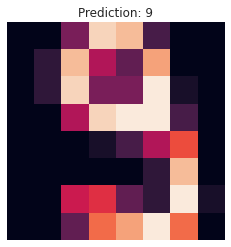

In [22]:
plt.imshow(sample.reshape(8,8))
plt.title(f"Prediction: {prediction}")
plt.axis("off")